Import necessary libraries and data

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svmm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv("./heart.csv")

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Check for missing data

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
X = data.iloc[:, 0:8]
y = data.iloc[:, -1]

Check for skewness in data

In [32]:
data.skew().sort_values(ascending=False)

fbs         1.986652
ca          1.310422
oldpeak     1.269720
chol        1.143401
exang       0.742532
trestbps    0.713768
cp          0.484732
restecg     0.162522
target     -0.179821
age        -0.202463
thal       -0.476722
slope      -0.508316
thalach    -0.537410
sex        -0.791335
dtype: float64

For values greather than 1, we'll apply log transformation

<AxesSubplot:xlabel='age', ylabel='count'>

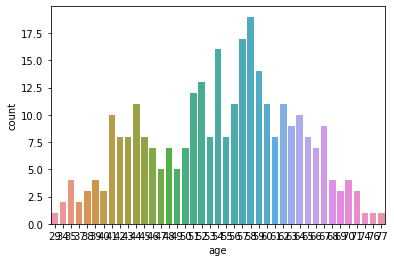

In [10]:
sns.countplot(data = data, x = 'age')

<AxesSubplot:xlabel='age'>

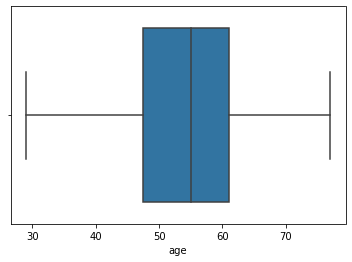

In [35]:
sns.boxplot(data = data, x = 'age')

<AxesSubplot:xlabel='sex', ylabel='count'>

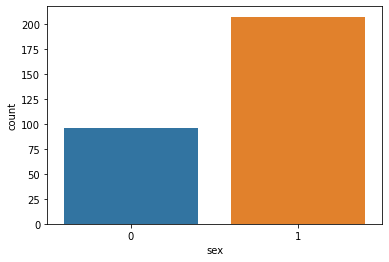

In [11]:
sns.countplot(data = data, x = 'sex')

<AxesSubplot:xlabel='cp', ylabel='count'>

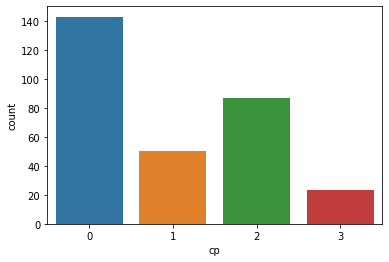

In [37]:
sns.countplot(data = data, x = 'cp')

<AxesSubplot:xlabel='trestbps', ylabel='count'>

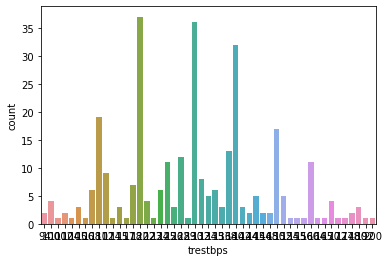

In [13]:
sns.countplot(data = data, x = 'trestbps')

<AxesSubplot:xlabel='trestbps'>

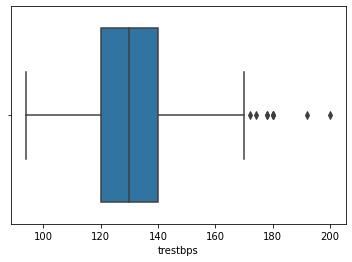

In [106]:
sns.boxplot(data = data, x = 'trestbps')

Deal with outliers (values greather than 165)

In [134]:
trestpbs_outliers = data.loc[data['trestbps'] > 165]

print(trestpbs_outliers['trestbps'].count(), "entries having trestpbs value greater than 165!")

13 entries having trestpbs value greater than 165!


In [135]:
data["trestbps"] = data["trestbps"].apply(lambda x: 165 if x > 165 else x)
data["trestbps"] = data["trestbps"].fillna(data['trestbps'].median())

trestpbs_outliers = data.loc[data['trestbps'] > 165]
print(trestpbs_outliers['trestbps'].count(), "entries having trestbps value greater than 165!")

0 entries having trestbps value greater than 165!


<AxesSubplot:xlabel='trestbps'>

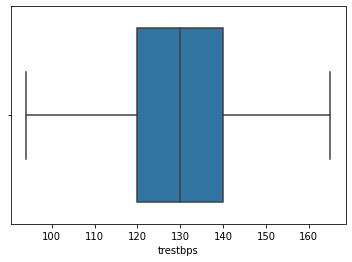

In [136]:
sns.boxplot(data = data, x = 'trestbps')

<AxesSubplot:xlabel='chol', ylabel='count'>

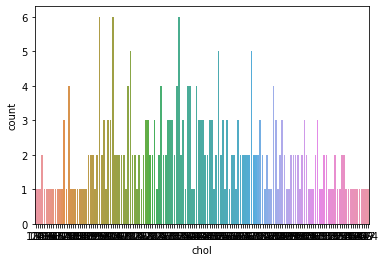

In [14]:
sns.countplot(data = data, x = 'chol')

<AxesSubplot:xlabel='chol'>

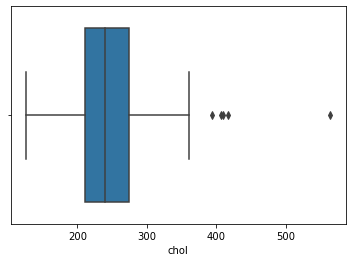

In [110]:
sns.boxplot(data = data, x = 'chol')

Deal with outliers (values greather than 370)

In [137]:
chol_outliers = data.loc[data['chol'] > 360]

print(chol_outliers['chol'].count(), "entries having trestpbs value greater than 360!")

5 entries having trestpbs value greater than 360!


In [144]:
data["chol"] = data["chol"].apply(lambda x: 360 if x > 360 else x)
data["chol"] = data["chol"].fillna(data['chol'].median())

chol_outliers = data.loc[data['chol'] > 360]
print(trestpbs_outliers['chol'].count(), "entries having chol value greater than 360!")

0 entries having chol value greater than 360!


In [145]:
data['chol'] = np.log(data['chol'])

<AxesSubplot:xlabel='chol'>

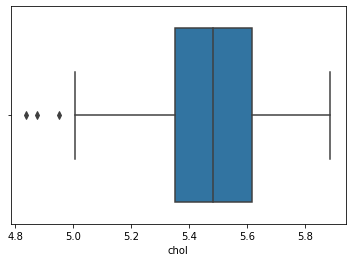

In [146]:
sns.boxplot(data = data, x = 'chol')

<AxesSubplot:xlabel='fbs', ylabel='count'>

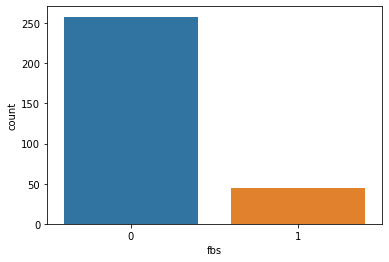

In [15]:
sns.countplot(data = data, x = 'fbs')

<AxesSubplot:xlabel='restecg', ylabel='count'>

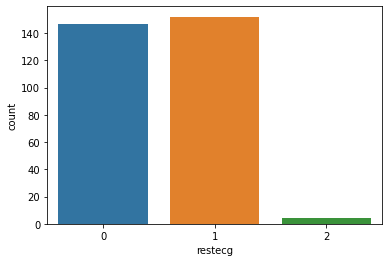

In [16]:
sns.countplot(data = data, x = 'restecg')

<AxesSubplot:xlabel='thalach', ylabel='count'>

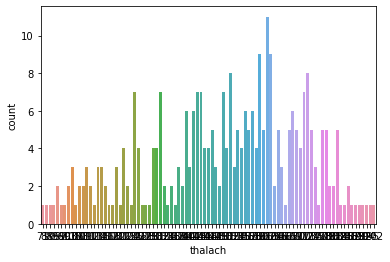

In [17]:
sns.countplot(data = data, x = 'thalach')

<AxesSubplot:xlabel='thalach'>

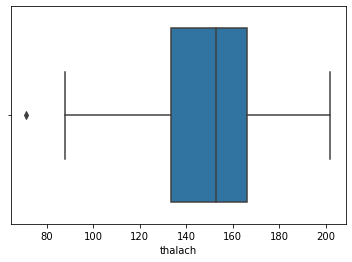

In [66]:
sns.boxplot(data = data, x = 'thalach')

Deal with outliers (values less than 90)

In [139]:
thalach_outliers = data.loc[data['thalach'] < 90]

print(thalach_outliers['thalach'].count(), "entries having thalach value less than 90!")

2 entries having thalach value less than 90!


In [140]:
data["thalach"] = data["thalach"].apply(lambda x: 90 if x < 90 else x)
data["thalach"] = data["thalach"].fillna(data['thalach'].median())

thalach_outliers = data.loc[data['thalach'] < 90]
print(thalach_outliers['thalach'].count(), "entries having thalach value less than 90!")

0 entries having thalach value less than 90!


<AxesSubplot:xlabel='thalach'>

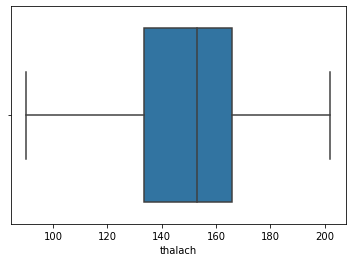

In [118]:
sns.boxplot(data = data, x = 'thalach')

<AxesSubplot:xlabel='exang', ylabel='count'>

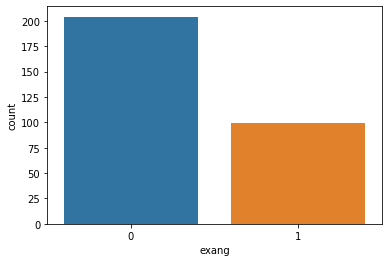

In [18]:
sns.countplot(data = data, x = 'exang')

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

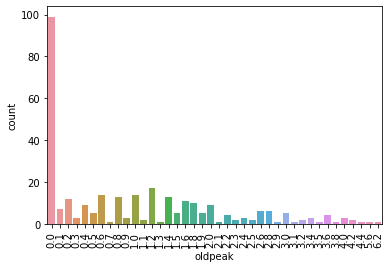

In [24]:
plt.xticks(rotation = 90)
sns.countplot(data = data, x = 'oldpeak')

<AxesSubplot:xlabel='oldpeak'>

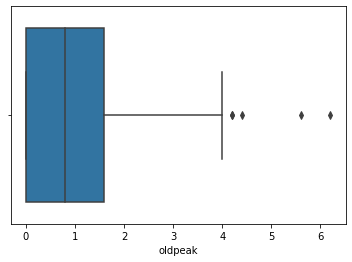

In [26]:
sns.boxplot(data = data, x = 'oldpeak') 

Deal with outliers (values greater than 4.0)

In [141]:
oldpeak_outliers = data.loc[data['oldpeak'] > 4.0]

print(oldpeak_outliers['oldpeak'].count(), "entries having oldpeak value less than 4.0!")

5 entries having oldpeak value less than 4.0!


In [142]:
data["oldpeak"] = data["oldpeak"].apply(lambda x: 4.0 if x > 4.0 else x)
data["oldpeak"] = data["oldpeak"].fillna(data['oldpeak'].median())

thalach_outliers = data.loc[data['oldpeak'] > 4.0]
print(thalach_outliers['oldpeak'].count(), "entries having thalach value greather than 4.0!")

0 entries having thalach value greather than 4.0!


<AxesSubplot:xlabel='oldpeak'>

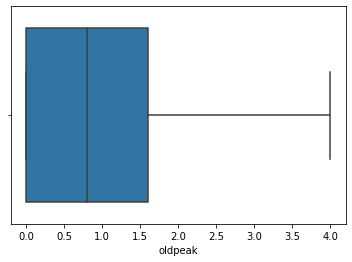

In [143]:
sns.boxplot(data = data, x = 'oldpeak') 

<AxesSubplot:xlabel='slope', ylabel='count'>

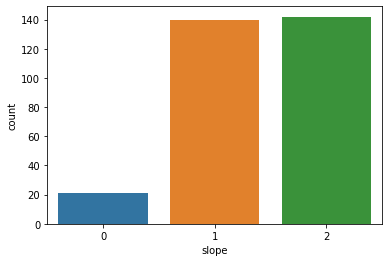

In [20]:
sns.countplot(data = data, x = 'slope')

<AxesSubplot:xlabel='ca', ylabel='count'>

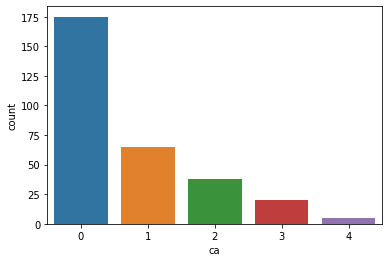

In [21]:
sns.countplot(data = data, x = 'ca')

<AxesSubplot:xlabel='thal', ylabel='count'>

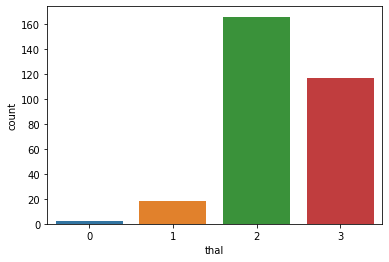

In [22]:
sns.countplot(data = data, x = 'thal')

<AxesSubplot:xlabel='target', ylabel='count'>

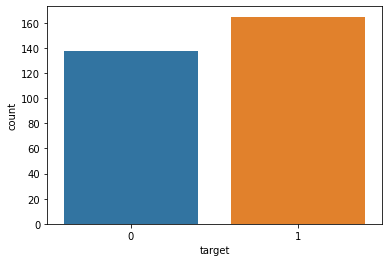

In [23]:
sns.countplot(data = data, x = 'target')

In [123]:
scaler = MinMaxScaler()

normalized_array = scaler.fit_transform(data[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])
normalized_df = pd.DataFrame(normalized_array, columns=['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

data[['sex','chol','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']] = normalized_df

In [124]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145,0.244292,1.0,0.0,150,0.0,2.3,0.0,0.0,0.333333,1
1,37,1.0,2,130,0.283105,0.0,0.5,187,0.0,3.5,0.0,0.0,0.666667,1
2,41,0.0,1,130,0.178082,0.0,0.0,172,0.0,1.4,1.0,0.0,0.666667,1
3,56,1.0,1,120,0.251142,0.0,0.5,178,0.0,0.8,1.0,0.0,0.666667,1
4,57,0.0,0,120,0.520548,0.0,0.5,163,1.0,0.6,1.0,0.0,0.666667,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

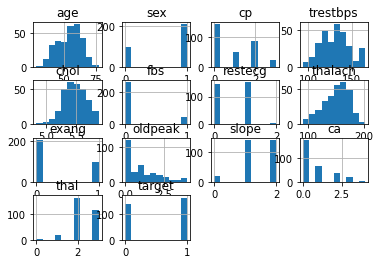

In [147]:
data.hist()

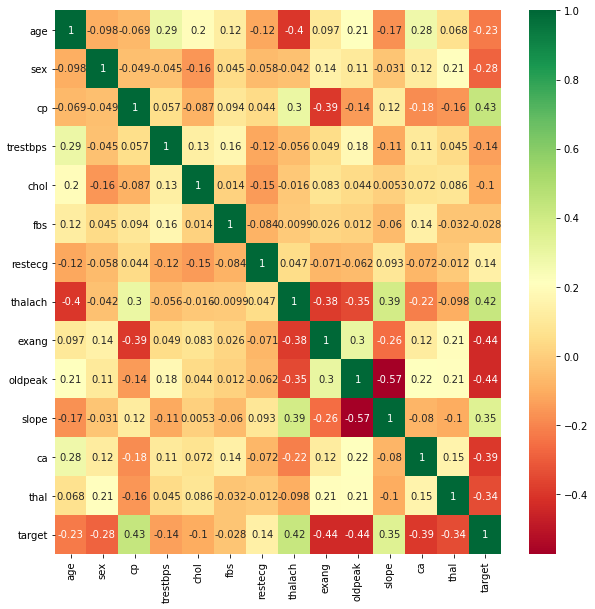

In [148]:
correlations = data.corr()
plt.figure(figsize=(10, 10))

heatmap_diabetes = sns.heatmap(data[correlations.index].corr(), annot=True, cmap='RdYlGn')

plt.show()

In [149]:
X = data.drop(['target'], axis = 1).values 
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [153]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [156]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[21,  6],
       [ 9, 25]])

In [157]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall/Sensitivity: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.7540983606557377
Precision:  0.8064516129032258
Recall/Sensitivity:  0.7352941176470589


In [159]:
smote = SMOTE(random_state = 45)

s_X_train, s_y_train =smote.fit_resample(X_train,y_train)
s_X_test, s_y_test = smote.fit_resample(X_test,y_test)


In [160]:
s_dt = DecisionTreeClassifier()

s_dt.fit(s_X_train, s_y_train)

s_y_pred = dt.predict(s_X_test)

In [161]:
s_cnf_matrix = metrics.confusion_matrix(s_y_test, s_y_pred)

s_cnf_matrix

array([[27,  7],
       [ 9, 25]])

- 27 patients were predicted that they will have Heart Disease,the Prediction was CORRECT (True-Positive)
- 25 patients were predicted that they will NOT have Heart Disease,the Prediction was CORRECT (True-Negative)
- 7 patients were predicted that they will have Heart Disease but the Prediction was WRONG (False-Positive)
- 9 patients were predicted that they will NOT have Heart Disease but the Prediction was WRONG (False-Negative)

In [162]:
print("Accuracy: ", metrics.accuracy_score(s_y_test, s_y_pred))
print("Precision: ", metrics.precision_score(s_y_test, s_y_pred))
print("Recall/Sensitivity: ", metrics.recall_score(s_y_test, s_y_pred))

Accuracy:  0.7647058823529411
Precision:  0.78125
Recall/Sensitivity:  0.7352941176470589


In [165]:
ml = svm.SVC(kernel='linear')

ml.fit(X_train, y_train)

y_svm = dt.predict(X_test)

In [166]:
ml.score(X_test, y_test)

0.8524590163934426